In [1]:
push!(LOAD_PATH, "../src/")
using Setup
using ODESolvers
using Output

┌ Info: Recompiling stale cache file /Users/yanagi/.julia/compiled/v1.0/Output.ji for Output [top-level]
└ @ Base loading.jl:1190


In [2]:
include("../src/PhysicalConstants.jl")

0.567

In [3]:
model, core, env, var = setup("../src/sample.ini")
sol = cooling(model, core, env, var);

In [4]:
model, core, env, var = setup("../src/sample2.ini")
sol2 = cooling(model, core, env, var);

In [5]:
using Plots
pyplot()

Plots.PyPlotBackend()

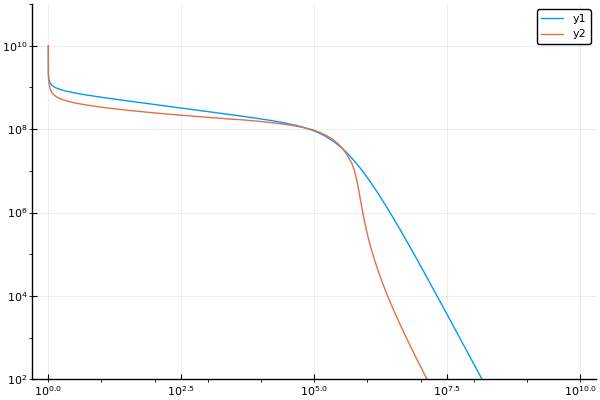

In [6]:
plot(sol.t, sol.u, scale=:log10, yscale=:log10)
plot!(sol2.t, sol2.u, scale=:log10, yscale=:log10)
ylims!(1e2,1e11)

In [7]:
model, core, env, var = setup("../src/sample.ini")
sol = heating(model, core, env, var, 1e-10, 1e-10);

In [8]:
model, core, env, var = setup("../src/sample2.ini")
sol2 = heating(model, core, env, var, 1e-10, 1e-10);

In [9]:
T = map(u->u[1], sol.u);
eta_e = map(u->u[2]/kB, sol.u);
eta_mu = map(u->u[3]/kB, sol.u);

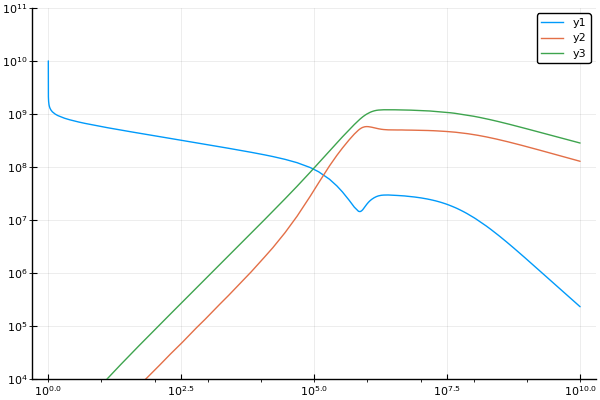

In [10]:
plot(sol.t, T, scale=:log10)
plot!(sol.t, eta_e, scale=:log10)
plot!(sol.t, eta_mu, scale=:log10)
ylims!(1e4,1e11)

In [11]:
T = map(u->u[1], sol2.u);
eta_e = map(u->u[2]/kB, sol2.u);
eta_mu = map(u->u[3]/kB, sol2.u);

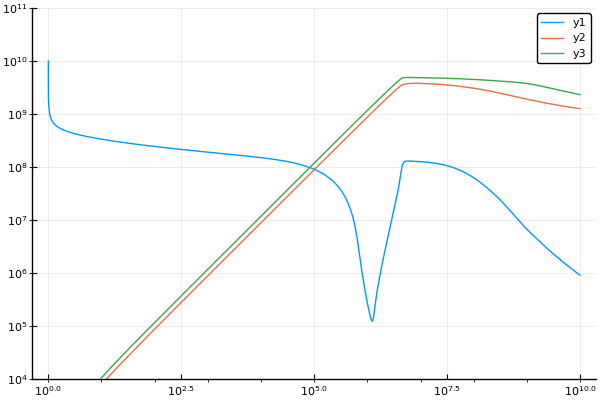

In [12]:
plot(sol2.t, T, scale=:log10)
plot!(sol2.t, eta_e, scale=:log10)
plot!(sol2.t, eta_mu, scale=:log10)
ylims!(1e4,1e11)

In [13]:
output_T(sol2, model, core, env, var)
output_LC(sol2, model, core, env, var)

In [14]:
write_ini(sol2, model)

In [15]:
model, core, env, var = setup("../src/test/card.ini")
sol2 = heating(model, core, env, var, 1e-10, 1e-10);

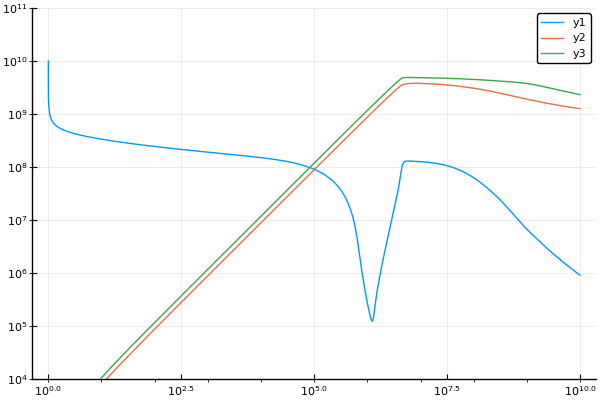

In [17]:
T = map(u->u[1], sol2.u);
eta_e = map(u->u[2]/kB, sol2.u);
eta_mu = map(u->u[3]/kB, sol2.u);
plot(sol2.t, T, scale=:log10)
plot!(sol2.t, eta_e, scale=:log10)
plot!(sol2.t, eta_mu, scale=:log10)
ylims!(1e4,1e11)